# Results of SRCNN Super-Resolution Experiments for Data Set 10.0015

Importing packages:

In [1]:
from PIL import Image, ImageStat
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import glob 
import random
import numpy as np
import os
import re
import cv2
import argparse
import pandas as pd
import math
import torch  
import torch.nn.functional as F 

## SRCNN

Create the data sets with results:

In [2]:
# Data Set 10.0015
# PSNR
val_results_psnr_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_psnr_all_0.csv')
val_results_psnr_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_psnr_all_1.csv')
val_results_psnr_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_psnr_all_2.csv')
val_results_psnr_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_psnr_all_3.csv')
val_results_psnr_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_psnr_all_4.csv')

# SSIM
val_results_ssim_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_ssim_all_0.csv')
val_results_ssim_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_ssim_all_1.csv')
val_results_ssim_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_ssim_all_2.csv')
val_results_ssim_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_ssim_all_3.csv')
val_results_ssim_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_ssim_all_4.csv')

# SSSIM
val_results_sssim_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_sssim_all_0.csv')
val_results_sssim_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_sssim_all_1.csv')
val_results_sssim_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_sssim_all_2.csv')
val_results_sssim_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_sssim_all_3.csv')
val_results_sssim_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/val_results_sssim_all_4.csv')


In [3]:
# crop the data frames
val_results_psnr_0 = val_results_psnr_0.iloc[:100,1:11]
val_results_psnr_1 = val_results_psnr_1.iloc[:100,1:11]
val_results_psnr_2 = val_results_psnr_2.iloc[:100,1:11]
val_results_psnr_3 = val_results_psnr_3.iloc[:100,1:11]
val_results_psnr_4 = val_results_psnr_4.iloc[:100,1:11]

val_results_ssim_0 = val_results_ssim_0.iloc[:100,1:11]
val_results_ssim_1 = val_results_ssim_1.iloc[:100,1:11]
val_results_ssim_2 = val_results_ssim_2.iloc[:100,1:11]
val_results_ssim_3 = val_results_ssim_3.iloc[:100,1:11]
val_results_ssim_4 = val_results_ssim_4.iloc[:100,1:11]

val_results_sssim_0 = val_results_sssim_0.iloc[:100,1:11]
val_results_sssim_1 = val_results_sssim_1.iloc[:100,1:11]
val_results_sssim_2 = val_results_sssim_2.iloc[:100,1:11]
val_results_sssim_3 = val_results_sssim_3.iloc[:100,1:11]
val_results_sssim_4 = val_results_sssim_4.iloc[:100,1:11]

In [4]:
# test set for all folds

# --------------------- Data Set 10.0015

# PSNR
test_results_psnr_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_psnr_all_0.csv')
test_results_psnr_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_psnr_all_1.csv')
test_results_psnr_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_psnr_all_2.csv')
test_results_psnr_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_psnr_all_3.csv')
test_results_psnr_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_psnr_all_4.csv')

# SSIM
test_results_ssim_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_ssim_all_0.csv')
test_results_ssim_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_ssim_all_1.csv')
test_results_ssim_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_ssim_all_2.csv')
test_results_ssim_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_ssim_all_3.csv')
test_results_ssim_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_ssim_all_4.csv')

# SSSIM 
test_results_sssim_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_sssim_all_0.csv')
test_results_sssim_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_sssim_all_1.csv')
test_results_sssim_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_sssim_all_2.csv')
test_results_sssim_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_sssim_all_3.csv')
test_results_sssim_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/test_results_sssim_all_4.csv')


In [5]:
# crop the data frames
test_results_psnr_0 = test_results_psnr_0.iloc[:251,1:11]
test_results_psnr_1 = test_results_psnr_1.iloc[:251,1:11]
test_results_psnr_2 = test_results_psnr_2.iloc[:251,1:11]
test_results_psnr_3 = test_results_psnr_3.iloc[:251,1:11]
test_results_psnr_4 = test_results_psnr_4.iloc[:251,1:11]

test_results_ssim_0 = test_results_ssim_0.iloc[:251,1:11]
test_results_ssim_1 = test_results_ssim_1.iloc[:251,1:11]
test_results_ssim_2 = test_results_ssim_2.iloc[:251,1:11]
test_results_ssim_3 = test_results_ssim_3.iloc[:251,1:11]
test_results_ssim_4 = test_results_ssim_4.iloc[:251,1:11]

test_results_sssim_0 = test_results_sssim_0.iloc[:251,1:11]
test_results_sssim_1 = test_results_sssim_1.iloc[:251,1:11]
test_results_sssim_2 = test_results_sssim_2.iloc[:251,1:11]
test_results_sssim_3 = test_results_sssim_3.iloc[:251,1:11]
test_results_sssim_4 = test_results_sssim_4.iloc[:251,1:11]

In [6]:
# train set for all folds

# --------------- Data Set 10.0015

# PSNR
train_results_psnr_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_psnr_all_0.csv')
train_results_psnr_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_psnr_all_1.csv')
train_results_psnr_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_psnr_all_2.csv')
train_results_psnr_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_psnr_all_3.csv')
train_results_psnr_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_psnr_all_4.csv')

# SSIM
train_results_ssim_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_ssim_all_0.csv')
train_results_ssim_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_ssim_all_1.csv')
train_results_ssim_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_ssim_all_2.csv')
train_results_ssim_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_ssim_all_3.csv')
train_results_ssim_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_ssim_all_4.csv')

# SSSIM
train_results_sssim_0 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_sssim_all_0.csv')
train_results_sssim_1 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_sssim_all_1.csv')
train_results_sssim_2 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_sssim_all_2.csv')
train_results_sssim_3 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_sssim_all_3.csv')
train_results_sssim_4 = pd.read_csv('/home/julia/SRCNN_2/results_10_0015_2/train_results_sssim_all_4.csv')


In [7]:
# crop the data frames
train_results_psnr_0 = train_results_psnr_0.iloc[:901,1:11]
train_results_psnr_1 = train_results_psnr_1.iloc[:901,1:11]
train_results_psnr_2 = train_results_psnr_2.iloc[:901,1:11]
train_results_psnr_3 = train_results_psnr_3.iloc[:901,1:11]
train_results_psnr_4 = train_results_psnr_4.iloc[:901,1:11]

train_results_ssim_0 = train_results_ssim_0.iloc[:901,1:11]
train_results_ssim_1 = train_results_ssim_1.iloc[:901,1:11]
train_results_ssim_2 = train_results_ssim_2.iloc[:901,1:11]
train_results_ssim_3 = train_results_ssim_3.iloc[:901,1:11]
train_results_ssim_4 = train_results_ssim_4.iloc[:901,1:11]

train_results_sssim_0 = train_results_sssim_0.iloc[:901,1:11]
train_results_sssim_1 = train_results_sssim_1.iloc[:901,1:11]
train_results_sssim_2 = train_results_sssim_2.iloc[:901,1:11]
train_results_sssim_3 = train_results_sssim_3.iloc[:901,1:11]
train_results_sssim_4 = train_results_sssim_4.iloc[:901,1:11]

## Visualize Validation data sets

### SSIM / SSSIM Scores for all n-folds separately

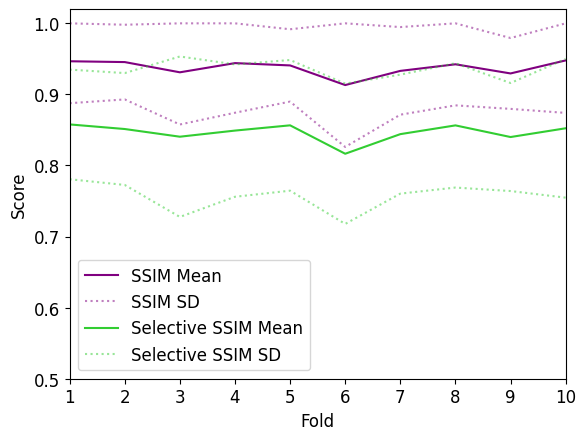

In [8]:
ssim_means = val_results_ssim_0.mean()
ssim_stds = val_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_0.mean()
sssim_stds = val_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_val_0.png")

In [9]:
print(ssim_means,ssim_stds)

0    0.946649
1    0.945494
2    0.931095
3    0.944041
4    0.940782
5    0.913168
6    0.933107
7    0.942371
8    0.929504
9    0.947824
dtype: float64 0    0.059021
1    0.052542
2    0.073418
3    0.069831
4    0.050896
5    0.087067
6    0.061638
7    0.057769
8    0.049853
9    0.073835
dtype: float64


In [10]:
print(sssim_means,sssim_stds)

0    0.857784
1    0.851308
2    0.840499
3    0.849109
4    0.856494
5    0.816513
6    0.844118
7    0.856422
8    0.840035
9    0.852359
dtype: float64 0    0.077122
1    0.078703
2    0.112872
3    0.093116
4    0.091928
5    0.098717
6    0.083695
7    0.087463
8    0.075984
9    0.097596
dtype: float64


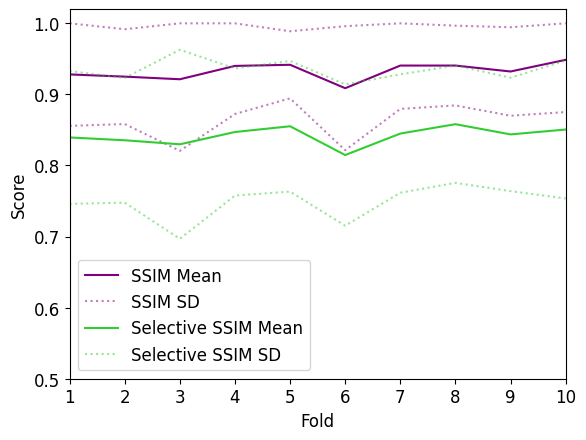

In [11]:
ssim_means = val_results_ssim_1.mean()
ssim_stds = val_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_1.mean()
sssim_stds = val_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_val_1.png")

In [12]:
print(ssim_means,ssim_stds)

0    0.928127
1    0.925013
2    0.921332
3    0.940109
4    0.941690
5    0.908746
6    0.940602
7    0.940602
8    0.932251
9    0.948663
dtype: float64 0    0.072383
1    0.066701
2    0.100709
3    0.067631
4    0.047195
5    0.087263
6    0.060965
7    0.056113
8    0.062236
9    0.073519
dtype: float64


In [13]:
print(sssim_means,ssim_stds)

0    0.839439
1    0.835485
2    0.829826
3    0.847113
4    0.855198
5    0.814689
6    0.844934
7    0.858119
8    0.843736
9    0.850584
dtype: float64 0    0.072383
1    0.066701
2    0.100709
3    0.067631
4    0.047195
5    0.087263
6    0.060965
7    0.056113
8    0.062236
9    0.073519
dtype: float64


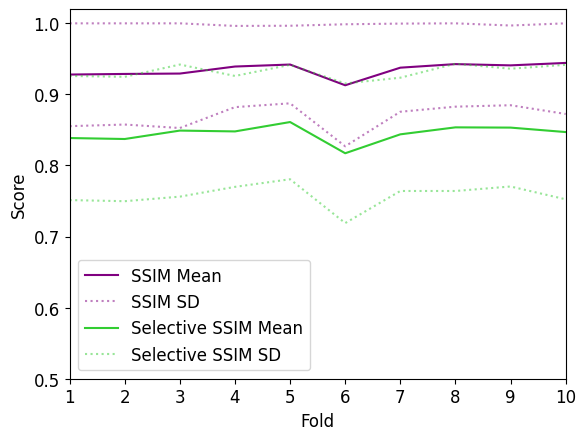

In [14]:
ssim_means = val_results_ssim_2.mean()
ssim_stds = val_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_2.mean()
sssim_stds = val_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_val_2.png")

In [15]:
print(ssim_means,ssim_stds)

0    0.927953
1    0.928803
2    0.929344
3    0.939232
4    0.942034
5    0.912857
6    0.937623
7    0.942638
8    0.940861
9    0.944292
dtype: float64 0    0.072624
1    0.071191
2    0.076619
3    0.057133
4    0.054571
5    0.085828
6    0.062007
7    0.059875
8    0.056079
9    0.071814
dtype: float64


In [16]:
print(sssim_means,sssim_stds )

0    0.838635
1    0.837265
2    0.849106
3    0.847938
4    0.861128
5    0.817215
6    0.843827
7    0.853654
8    0.853303
9    0.847039
dtype: float64 0    0.087307
1    0.087506
2    0.092930
3    0.078011
4    0.080486
5    0.098243
6    0.079684
7    0.089532
8    0.082839
9    0.094608
dtype: float64


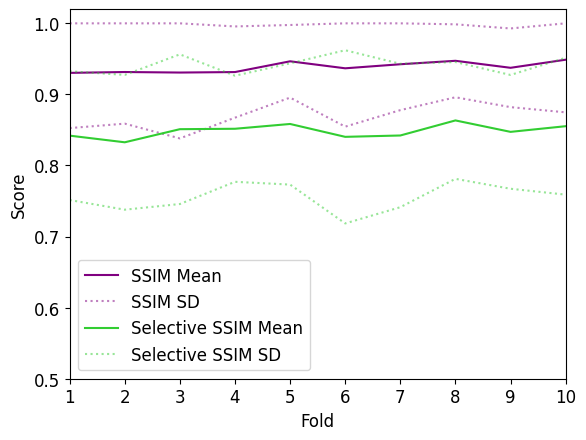

In [17]:
ssim_means = val_results_ssim_3.mean()
ssim_stds = val_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_3.mean()
sssim_stds = val_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_val_3.png")

In [18]:
print(ssim_means, ssim_stds)

0    0.930314
1    0.931519
2    0.930769
3    0.931459
4    0.946584
5    0.936739
6    0.942440
7    0.947298
8    0.937447
9    0.948828
dtype: float64 0    0.077711
1    0.072648
2    0.092658
3    0.064179
4    0.051085
5    0.082088
6    0.064561
7    0.051313
8    0.055348
9    0.074054
dtype: float64


In [19]:
print(sssim_means, sssim_stds )

0    0.841998
1    0.832638
2    0.851078
3    0.851671
4    0.858416
5    0.840306
6    0.842212
7    0.863400
8    0.847311
9    0.855278
dtype: float64 0    0.090567
1    0.094824
2    0.105281
3    0.074628
4    0.085280
5    0.121829
6    0.100878
7    0.082169
8    0.080051
9    0.096299
dtype: float64


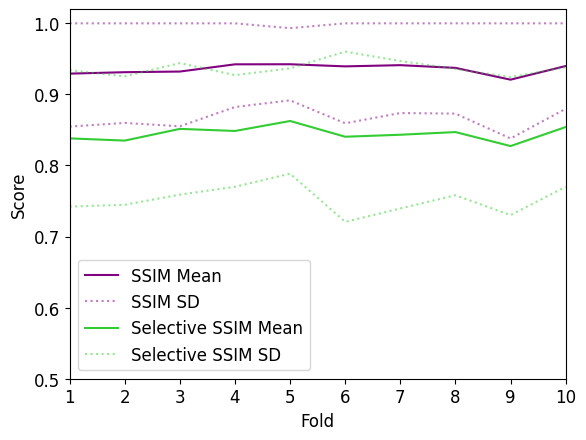

In [20]:
ssim_means = val_results_ssim_4.mean()
ssim_stds = val_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_4.mean()
sssim_stds = val_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_val_4.png")

In [21]:
print(ssim_means, ssim_stds)

0    0.929247
1    0.931257
2    0.932179
3    0.942337
4    0.942442
5    0.939454
6    0.941152
7    0.937337
8    0.920738
9    0.939923
dtype: float64 0    0.074520
1    0.071375
2    0.077043
3    0.060083
4    0.050757
5    0.080082
6    0.067349
7    0.064351
8    0.082744
9    0.060175
dtype: float64


In [22]:
print(sssim_means,sssim_stds )

0    0.838140
1    0.835033
2    0.851522
3    0.848581
4    0.862606
5    0.840457
6    0.843270
7    0.847022
8    0.827331
9    0.854107
dtype: float64 0    0.095962
1    0.090324
2    0.092519
3    0.078527
4    0.074117
5    0.119763
6    0.103715
7    0.088881
8    0.097087
9    0.084046
dtype: float64


### PSNR results for all n-folds separately

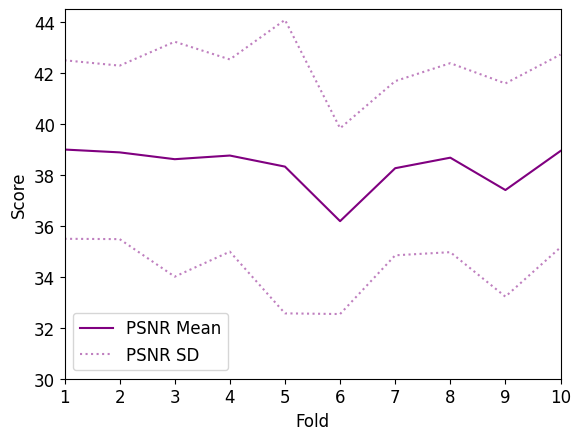

In [24]:
psnr_means = val_results_psnr_0.mean()
psnr_stds = val_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10_0015/psnr_val_0.png")

In [25]:
print(psnr_means, psnr_stds)

0    38.991236
1    38.879956
2    38.612359
3    38.755525
4    38.321440
5    36.181745
6    38.258994
7    38.671977
8    37.402271
9    38.935978
dtype: float64 0    3.501678
1    3.403032
2    4.608700
3    3.770651
4    5.757296
5    3.644017
6    3.416984
7    3.707365
8    4.182314
9    3.781702
dtype: float64


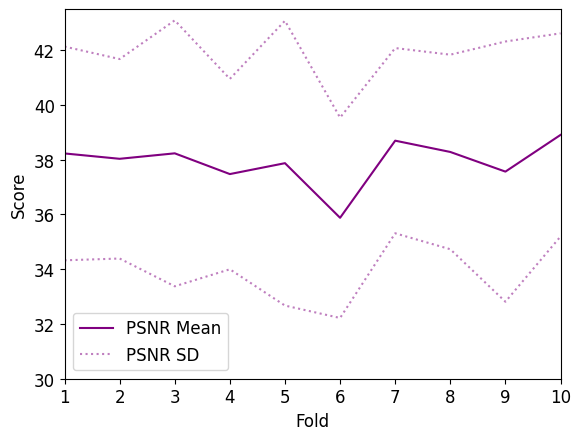

In [29]:
psnr_means = val_results_psnr_1.mean()
psnr_stds = val_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_val_1.png")

In [30]:
print(psnr_means, psnr_stds)

0    38.228642
1    38.032996
2    38.232506
3    37.474874
4    37.872898
5    35.878199
6    38.695082
7    38.282549
8    37.564711
9    38.905219
dtype: float64 0    3.903660
1    3.642717
2    4.857182
3    3.477321
4    5.201074
5    3.659574
6    3.382737
7    3.553400
8    4.752605
9    3.710279
dtype: float64


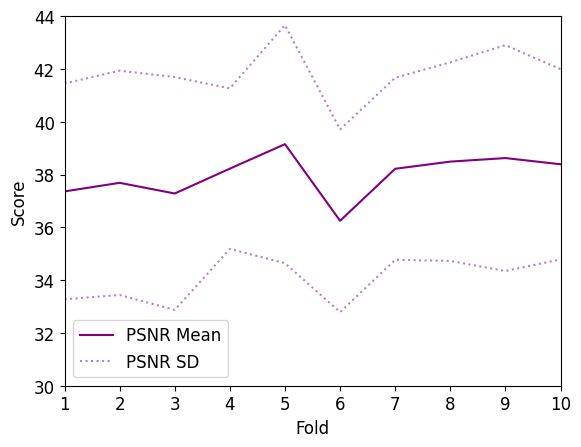

In [32]:
psnr_means = val_results_psnr_2.mean()
psnr_stds = val_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10_0015/psnr_val_2.png")

In [33]:
print(psnr_means, psnr_stds)

0    37.360237
1    37.685759
2    37.280987
3    38.223340
4    39.150056
5    36.248426
6    38.217410
7    38.488967
8    38.622994
9    38.388878
dtype: float64 0    4.086570
1    4.248069
2    4.409098
3    3.041431
4    4.507015
5    3.461855
6    3.448051
7    3.762040
8    4.277627
9    3.603343
dtype: float64


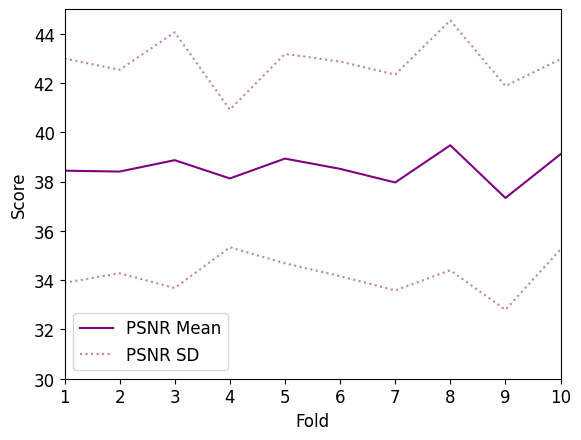

In [36]:
psnr_means = val_results_psnr_3.mean()
psnr_stds = val_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=45)
plt.savefig("srcnn_results_10_0015/psnr_val_3.png")

In [37]:
print(psnr_means, psnr_stds)

0    38.443610
1    38.407413
2    38.869681
3    38.127718
4    38.933773
5    38.517437
6    37.964480
7    39.474350
8    37.336617
9    39.112673
dtype: float64 0    4.552065
1    4.128280
2    5.191112
3    2.793736
4    4.249636
5    4.353695
6    4.379999
7    5.072197
8    4.540993
9    3.860807
dtype: float64


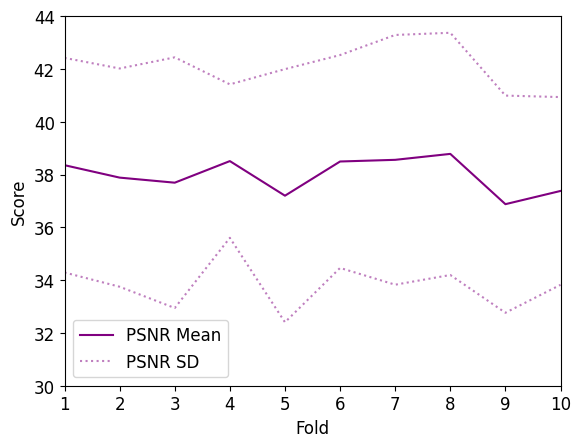

In [40]:
psnr_means = val_results_psnr_4.mean()
psnr_stds = val_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10_0015/psnr_val_4.png")

In [41]:
print(psnr_means, psnr_stds)

0    38.353804
1    37.882763
2    37.690915
3    38.508709
4    37.198141
5    38.493453
6    38.556551
7    38.781496
8    36.876914
9    37.377683
dtype: float64 0    4.064546
1    4.133567
2    4.747223
3    2.906717
4    4.794004
5    4.031751
6    4.729825
7    4.587498
8    4.112922
9    3.555687
dtype: float64


## Visualize Test Set

### SSIM / SSSIM Comparison for each n-fold

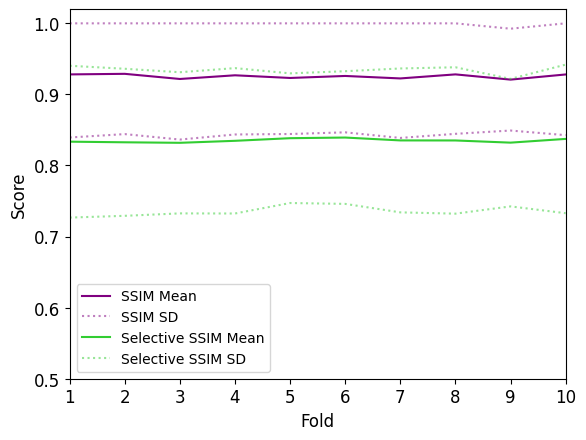

In [55]:
ssim_means = test_results_ssim_0.mean()
ssim_stds = test_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_0.mean()
sssim_stds = test_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_test_0.png")

In [43]:
print(ssim_means, ssim_stds)

0    0.928159
1    0.928958
2    0.921715
3    0.926902
4    0.923141
5    0.925967
6    0.922487
7    0.928179
8    0.920819
9    0.928074
dtype: float64 0    0.088776
1    0.084793
2    0.085225
3    0.083274
4    0.078835
5    0.079327
6    0.083723
7    0.083643
8    0.071632
9    0.085402
dtype: float64


In [44]:
print(sssim_means,sssim_stds)

0    0.833514
1    0.832635
2    0.831911
3    0.834719
4    0.838410
5    0.839312
6    0.835273
7    0.835207
8    0.832148
9    0.837404
dtype: float64 0    0.106793
1    0.103440
2    0.099297
3    0.102268
4    0.091203
5    0.093334
6    0.101224
7    0.102983
8    0.089707
9    0.104522
dtype: float64


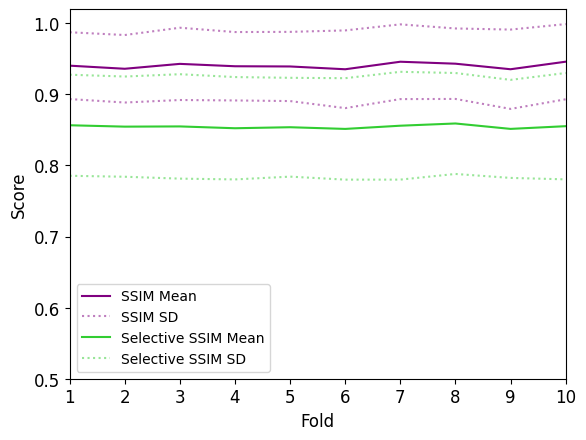

In [45]:
ssim_means = test_results_ssim_1.mean()
ssim_stds = test_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_1.mean()
sssim_stds = test_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_test_1.png")

In [46]:
print(ssim_means, ssim_stds)

0    0.940450
1    0.936077
2    0.942972
3    0.939628
4    0.939318
5    0.935388
6    0.945978
7    0.943218
8    0.935418
9    0.946020
dtype: float64 0    0.047005
1    0.047482
2    0.050845
3    0.048119
4    0.048683
5    0.054663
6    0.052571
7    0.049580
8    0.055799
9    0.052885
dtype: float64


In [47]:
print(sssim_means,sssim_stds)

0    0.856610
1    0.854661
2    0.854972
3    0.852409
4    0.853841
5    0.851464
6    0.855970
7    0.859104
8    0.851492
9    0.855303
dtype: float64 0    0.071097
1    0.070500
2    0.073459
3    0.072005
4    0.069517
5    0.071357
6    0.075837
7    0.071016
8    0.068970
9    0.074816
dtype: float64


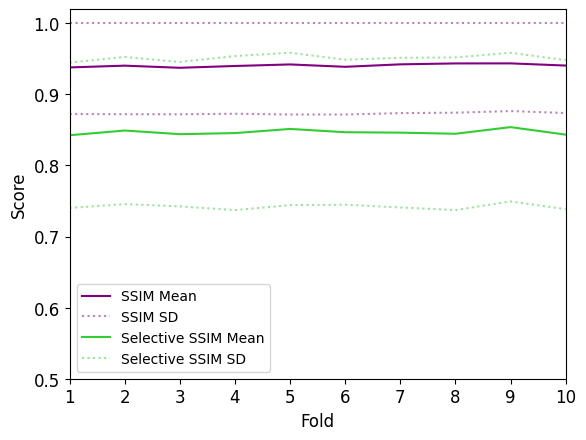

In [48]:
ssim_means = test_results_ssim_2.mean()
ssim_stds = test_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_2.mean()
sssim_stds = test_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_test_2.png")

In [49]:
print(ssim_means, ssim_stds)

0    0.937981
1    0.940463
2    0.937459
3    0.940004
4    0.942169
5    0.938839
6    0.942306
7    0.943600
8    0.943675
9    0.940605
dtype: float64 0    0.065524
1    0.068363
2    0.065422
3    0.067186
4    0.070436
5    0.067137
6    0.068593
7    0.069334
8    0.067110
9    0.066784
dtype: float64


In [50]:
print(sssim_means,sssim_stds)

0    0.842571
1    0.849180
2    0.844065
3    0.845600
4    0.851430
5    0.846818
6    0.846211
7    0.844660
8    0.853981
9    0.843427
dtype: float64 0    0.102273
1    0.103524
2    0.101598
3    0.108357
4    0.107212
5    0.102009
6    0.105259
7    0.107370
8    0.104571
9    0.104836
dtype: float64


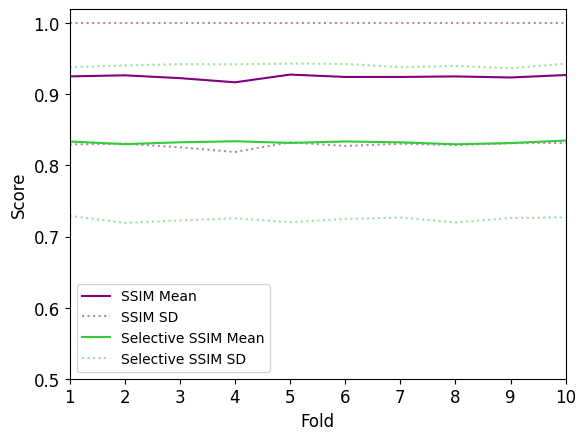

In [51]:
ssim_means = test_results_ssim_3.mean()
ssim_stds = test_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_3.mean()
sssim_stds = test_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_test_3.png")

In [52]:
print(ssim_means, ssim_stds)

0    0.925363
1    0.926868
2    0.922893
3    0.917052
4    0.927897
5    0.924579
6    0.924555
7    0.925320
8    0.923816
9    0.927262
dtype: float64 0    0.095826
1    0.096088
2    0.097300
3    0.098069
4    0.095299
5    0.097122
6    0.093982
7    0.096479
8    0.092471
9    0.095446
dtype: float64


In [53]:
print(sssim_means,sssim_stds)

0    0.833775
1    0.830025
2    0.832614
3    0.834105
4    0.831768
5    0.833790
6    0.832573
7    0.829851
8    0.831514
9    0.835132
dtype: float64 0    0.104602
1    0.110666
2    0.109952
3    0.108329
4    0.111561
5    0.109017
6    0.105804
7    0.110110
8    0.105354
9    0.108160
dtype: float64


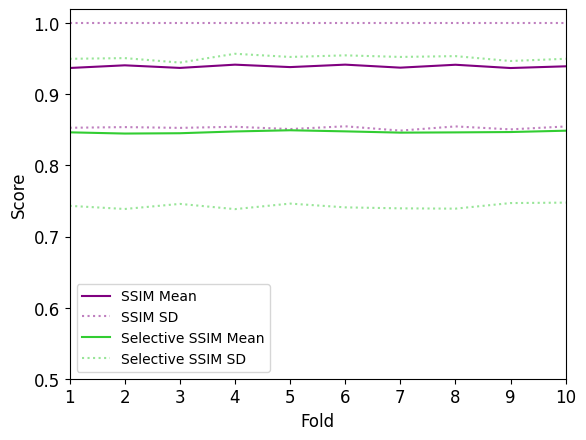

In [56]:
ssim_means = test_results_ssim_4.mean()
ssim_stds = test_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_4.mean()
sssim_stds = test_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_test_4.png")

In [57]:
print(ssim_means, ssim_stds)

0    0.937183
1    0.940934
2    0.937284
3    0.941858
4    0.938437
5    0.941889
6    0.937654
7    0.941735
8    0.937119
9    0.939544
dtype: float64 0    0.084112
1    0.086924
2    0.084343
3    0.087401
4    0.087168
5    0.086745
6    0.088554
7    0.086756
8    0.086287
9    0.084657
dtype: float64


In [58]:
print(sssim_means,sssim_stds)

0    0.846654
1    0.844939
2    0.845387
3    0.847893
4    0.849558
5    0.848020
6    0.846221
7    0.846580
8    0.847069
9    0.848950
dtype: float64 0    0.103441
1    0.106136
2    0.099409
3    0.109280
4    0.103160
5    0.106930
6    0.106517
7    0.107292
8    0.099940
9    0.101186
dtype: float64


### SSIM / SSSIM Comparison for all n-folds

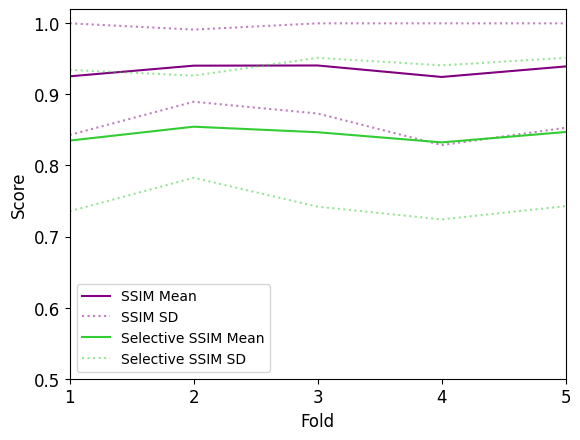

In [59]:
ssim_means_0 = test_results_ssim_0.mean()
ssim_stds_0 = test_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = test_results_ssim_1.mean()
ssim_stds_1 = test_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = test_results_ssim_2.mean()
ssim_stds_2 = test_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = test_results_ssim_3.mean()
ssim_stds_3 = test_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = test_results_ssim_4.mean()
ssim_stds_4 = test_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = test_results_sssim_0.mean()
sssim_stds_0 = test_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = test_results_sssim_1.mean()
sssim_stds_1 = test_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = test_results_sssim_2.mean()
sssim_stds_2 = test_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = test_results_sssim_3.mean()
sssim_stds_3 = test_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = test_results_sssim_4.mean()
sssim_stds_4 = test_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"], fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_test_mean_all_folds.png")

In [60]:
print(ssim_means, ssim_stds)

[0.9254401282485263, 0.9404468117957097, 0.9407100724746507, 0.9245605971708717, 0.9393635035392298] [0.08246304031284299, 0.05076320184728367, 0.06758891213651277, 0.09580831024419663, 0.08629483277620899]


In [61]:
print(sssim_means, sssim_stds)

[0.835053305333829, 0.8545826760658706, 0.8467943181376534, 0.8325148301651752, 0.8471269612530788] [0.09947727312507929, 0.07185758455018922, 0.10470086569174675, 0.10835544811435846, 0.10432895307755138]


### SSSIM/SSIM Comparison over all n-folds


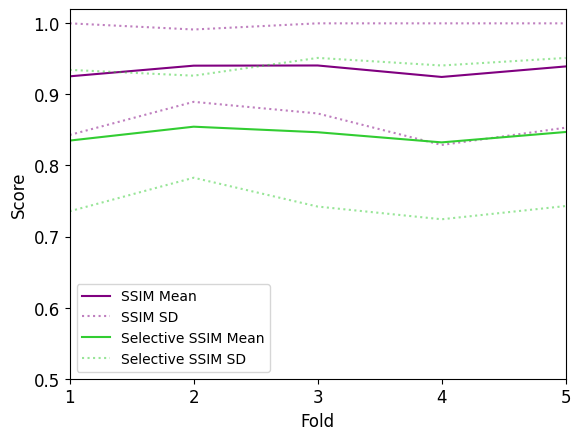

In [21]:
fold_0_test_ssim = np.array(test_results_ssim_0).reshape(-1,1)
fold_1_test_ssim = np.array(test_results_ssim_1).reshape(-1,1)
fold_2_test_ssim = np.array(test_results_ssim_2).reshape(-1,1)
fold_3_test_ssim = np.array(test_results_ssim_3).reshape(-1,1)
fold_4_test_ssim = np.array(test_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_test_ssim)
ssim_std_0 = np.std(fold_0_test_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_test_ssim)
ssim_std_1 = np.std(fold_1_test_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_test_ssim)
ssim_std_2 = np.std(fold_2_test_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_test_ssim)
ssim_std_3 = np.std(fold_3_test_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_test_ssim)
ssim_std_4 = np.std(fold_4_test_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_test_sssim = np.array(test_results_sssim_0).reshape(-1,1)
fold_1_test_sssim = np.array(test_results_sssim_1).reshape(-1,1)
fold_2_test_sssim = np.array(test_results_sssim_2).reshape(-1,1)
fold_3_test_sssim = np.array(test_results_sssim_3).reshape(-1,1)
fold_4_test_sssim = np.array(test_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_test_sssim)
sssim_std_0 = np.std(fold_0_test_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_test_sssim)
sssim_std_1 = np.std(fold_1_test_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_test_sssim)
sssim_std_2 = np.std(fold_2_test_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_test_sssim)
sssim_std_3 = np.std(fold_3_test_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_test_sssim)
sssim_std_4 = np.std(fold_4_test_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_test_mean_std_all_folds.png")

In [22]:
print(ssim_means, ssim_stds)

[0.9254401282485263, 0.9404468117957097, 0.9407100724746507, 0.9245605971708716, 0.9393635035392298] [0.08247493308624336, 0.05089165276840305, 0.06750361362626976, 0.09567427758607765, 0.08615625548648757]


In [23]:
print(sssim_means, sssim_stds)

[0.835053305333829, 0.8545826760658705, 0.8467943181376533, 0.8325148301651754, 0.8471269612530788] [0.09947004841616952, 0.07178113084676878, 0.10457476959200977, 0.10817571369063281, 0.10417996261893306]


### Stability Score Calculation

In [24]:
stability_score = 1 - 2*np.mean(sssim_stds)
print(stability_score)

0.8047273499341945


### Distribution of SSIM/SSSIM Values

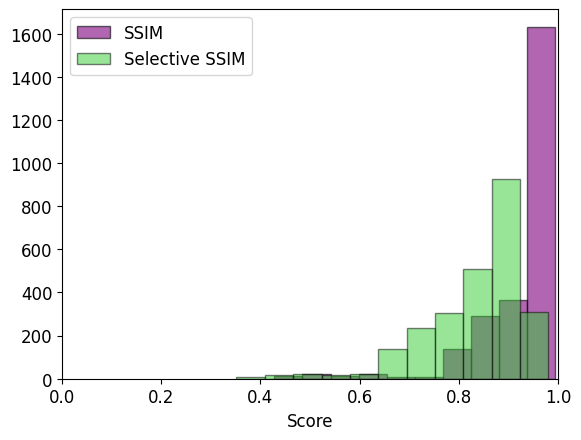

In [65]:
# n fold 0 

plt.figure()
plt.hist(fold_0_test_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_test_sssim, bins=11, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_test_0.png")

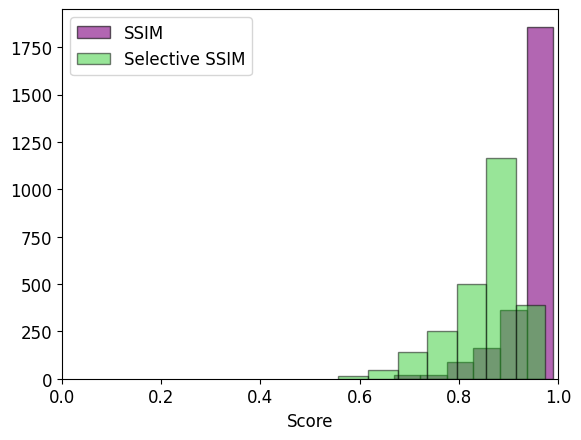

In [79]:
# n fold 01

plt.figure()
plt.hist(fold_1_test_ssim, bins=6, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_test_sssim, bins=7, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_test_1.png")

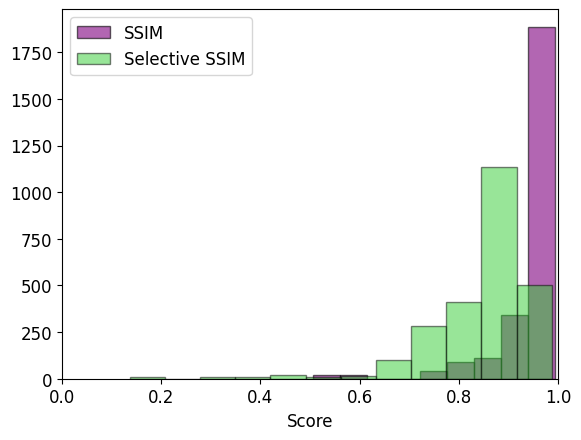

In [80]:
# n fold 2

plt.figure()
plt.hist(fold_2_test_ssim, bins=9, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_test_sssim, bins=12, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_test_2.png")

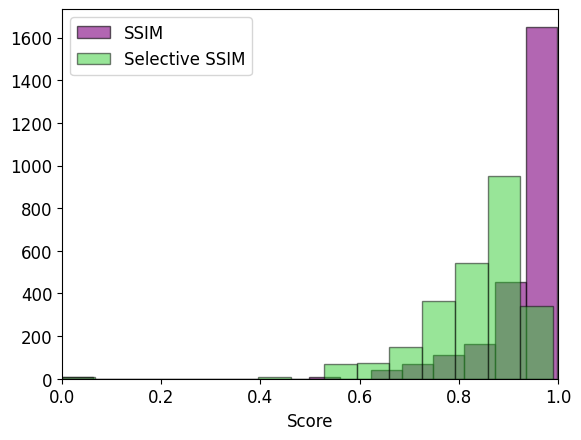

In [74]:
# n fold 3 

plt.figure()
plt.hist(fold_3_test_ssim, bins=16, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_test_sssim, bins=15, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_test_3.png")

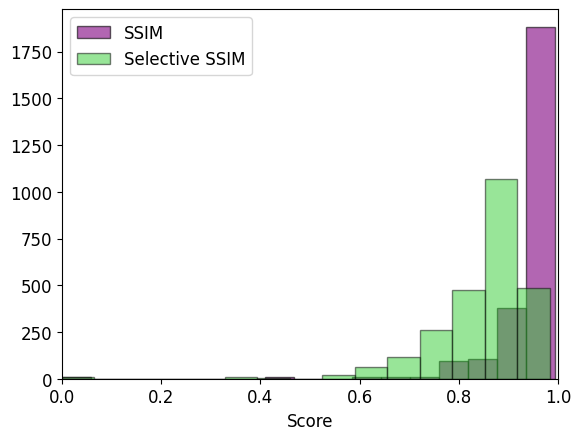

In [81]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_ssim, bins=17, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_test_sssim, bins=15, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_test_4.png")

### PSNR Comparison for each n-fold

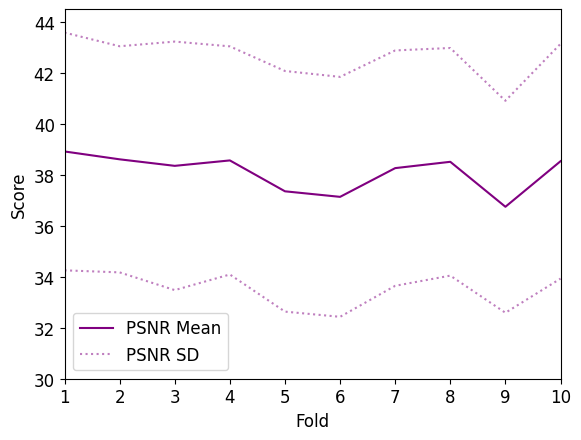

In [82]:
psnr_means = test_results_psnr_0.mean()
psnr_stds = test_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)
plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10_0015/psnr_test_0.png")

In [83]:
print(psnr_means, psnr_stds)

0    38.915759
1    38.607398
2    38.351528
3    38.564271
4    37.352568
5    37.134971
6    38.262229
7    38.510036
8    36.745789
9    38.532872
dtype: float64 0    4.663417
1    4.435553
2    4.875042
3    4.474916
4    4.720300
5    4.706315
6    4.617024
7    4.465176
8    4.157878
9    4.605975
dtype: float64


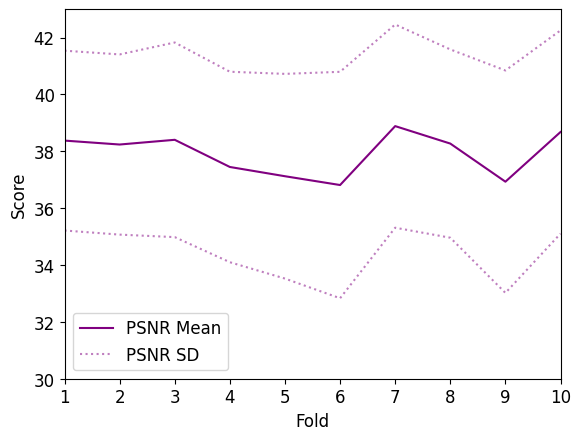

In [85]:
psnr_means = test_results_psnr_1.mean()
psnr_stds = test_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=43)
plt.savefig("srcnn_results_10_0015/psnr_test_1.png")

In [86]:
print(psnr_means, psnr_stds)

0    38.375629
1    38.237567
2    38.403490
3    37.447756
4    37.122299
5    36.812808
6    38.885205
7    38.270768
8    36.930070
9    38.678265
dtype: float64 0    3.162395
1    3.168983
2    3.422777
3    3.349763
4    3.600032
5    3.982252
6    3.574077
7    3.311577
8    3.911574
9    3.574643
dtype: float64


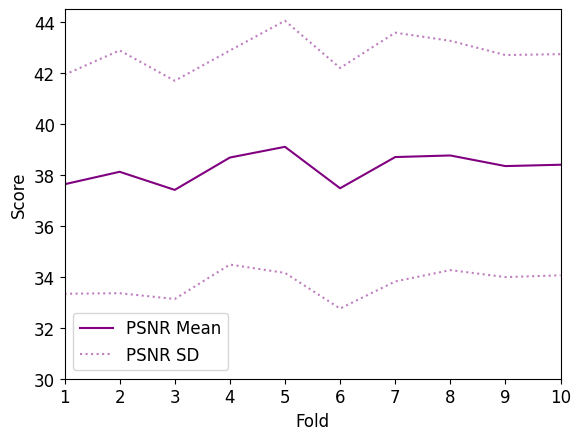

In [89]:
psnr_means = test_results_psnr_2.mean()
psnr_stds = test_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10_0015/psnr_test_2.png")

In [90]:
print(psnr_means, psnr_stds)

0    37.629464
1    38.117906
2    37.407985
3    38.677441
4    39.098071
5    37.471685
6    38.696298
7    38.758587
8    38.342179
9    38.395387
dtype: float64 0    4.295981
1    4.762441
2    4.280205
3    4.199004
4    4.946346
5    4.719439
6    4.880117
7    4.498046
8    4.355473
9    4.338124
dtype: float64


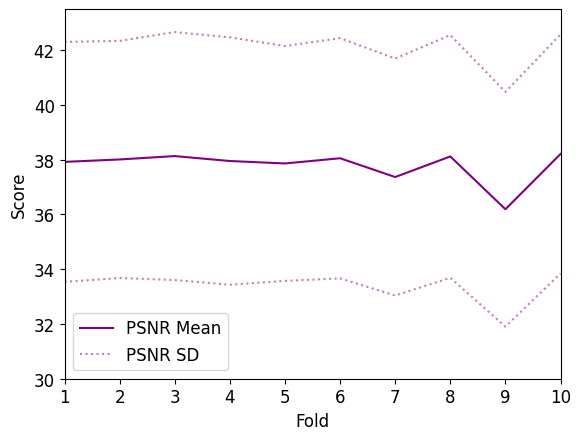

In [91]:
psnr_means = test_results_psnr_3.mean()
psnr_stds = test_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_test_3.png")

In [92]:
print(psnr_means, psnr_stds)

0    37.920093
1    38.008994
2    38.132193
3    37.951990
4    37.862514
5    38.053030
6    37.366744
7    38.119244
8    36.189745
9    38.209566
dtype: float64 0    4.381633
1    4.331716
2    4.528559
3    4.518041
4    4.288594
5    4.387890
6    4.327648
7    4.433767
8    4.286901
9    4.364965
dtype: float64


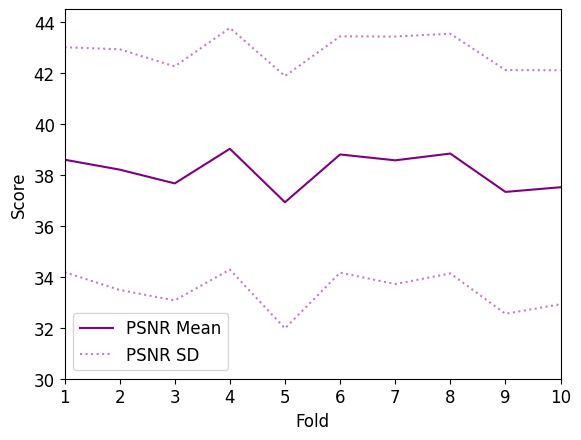

In [93]:
psnr_means = test_results_psnr_4.mean()
psnr_stds = test_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44.5)
plt.savefig("srcnn_results_10_0015/psnr_test_4.png")

In [94]:
print(psnr_means, psnr_stds)

0    38.593207
1    38.203399
2    37.662316
3    39.021800
4    36.923152
5    38.797917
6    38.568081
7    38.833285
8    37.329323
9    37.511802
dtype: float64 0    4.411895
1    4.720996
2    4.590028
3    4.741103
4    4.949109
5    4.634898
6    4.856611
7    4.701795
8    4.780760
9    4.590694
dtype: float64


### PSNR vals for all n-folds combined

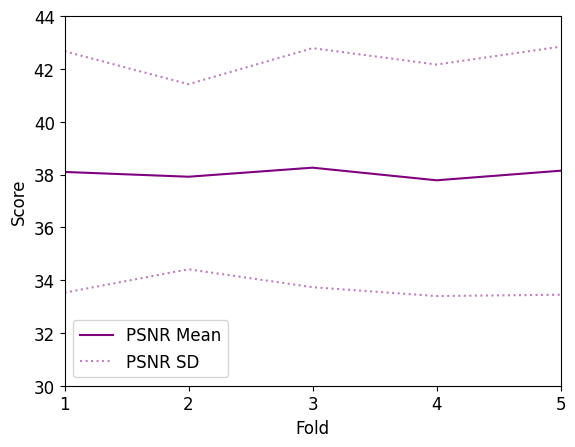

In [96]:
psnr_means_0 = test_results_psnr_0.mean()
psnr_stds_0 = test_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = test_results_psnr_1.mean()
psnr_stds_1 = test_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = test_results_psnr_2.mean()
psnr_stds_2 = test_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = test_results_psnr_3.mean()
psnr_stds_3 = test_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = test_results_psnr_4.mean()
psnr_stds_4 = test_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10_0015/psnr_test_mean_all_folds.png")

In [97]:
print(psnr_means, psnr_stds)

[38.09774203281479, 37.916385841369625, 38.25950030368638, 37.781411301662246, 38.14442830256732] [4.572159494252462, 3.5058073604703504, 4.527517615621766, 4.384971337191411, 4.697788978722158]


### PSNR means and stds over all n-folds

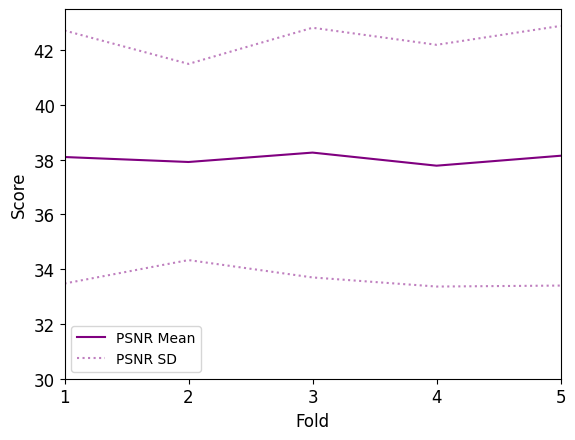

In [11]:
fold_0_test_psnr = np.array(test_results_psnr_0).reshape(-1,1)
fold_1_test_psnr = np.array(test_results_psnr_1).reshape(-1,1)
fold_2_test_psnr = np.array(test_results_psnr_2).reshape(-1,1)
fold_3_test_psnr = np.array(test_results_psnr_3).reshape(-1,1)
fold_4_test_psnr = np.array(test_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_test_psnr)
psnr_std_0 = np.std(fold_0_test_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_test_psnr)
psnr_std_1 = np.std(fold_1_test_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_test_psnr)
psnr_std_2 = np.std(fold_2_test_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_test_psnr)
psnr_std_3 = np.std(fold_3_test_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_test_psnr)
psnr_std_4 = np.std(fold_4_test_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_test_mean_std_all_folds.png")

In [12]:
print(psnr_means, psnr_stds)

[38.097742032814786, 37.91638584136963, 38.25950030368638, 37.781411301662246, 38.14442830256732] [4.620322974111433, 3.5827574481752724, 4.5601683589587285, 4.4145882965415835, 4.741970953942968]


### Distribution of PSNR Values

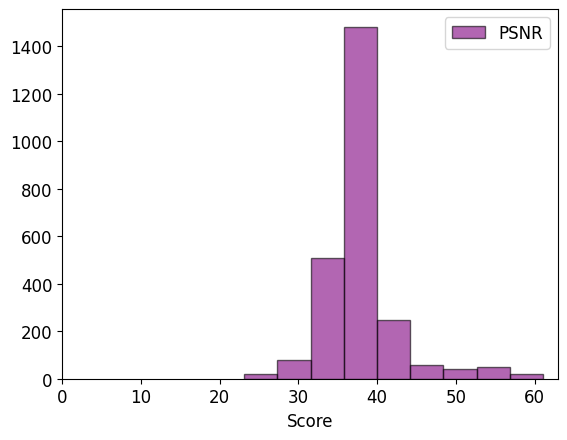

In [113]:
# n fold 0
plt.figure()
plt.hist(fold_0_test_psnr, bins=9, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_test_0.png")

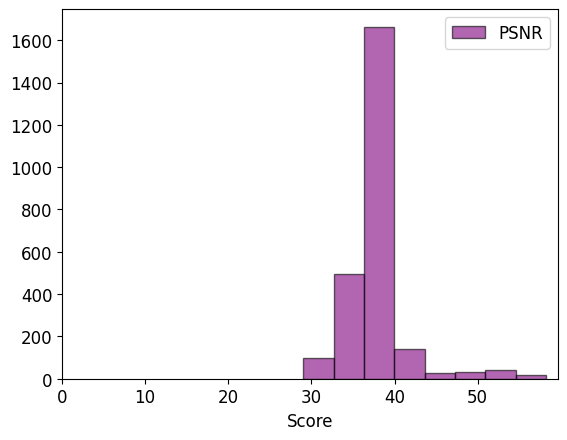

In [112]:
# n fold 1
plt.figure()
plt.hist(fold_1_test_psnr, bins=8, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_test_1.png")

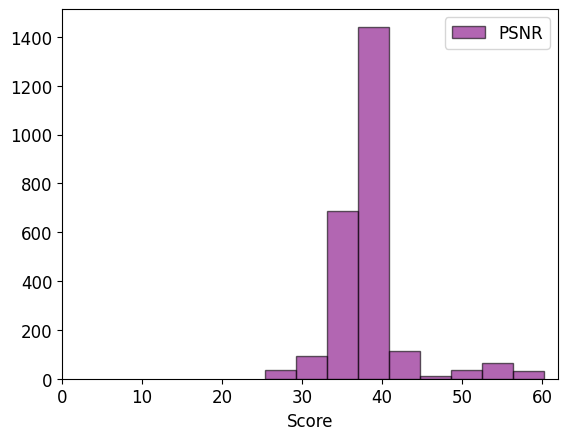

In [109]:
# n fold 2
plt.figure()
plt.hist(fold_2_test_psnr, bins=9, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_test_2.png")

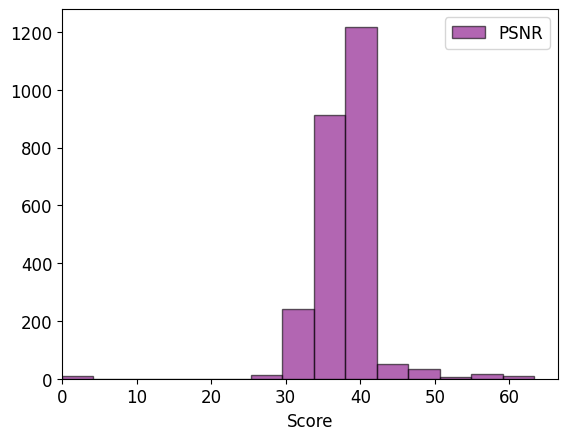

In [107]:
# n fold 3
plt.figure()
plt.hist(fold_3_test_psnr, bins=15, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_test_3.png")

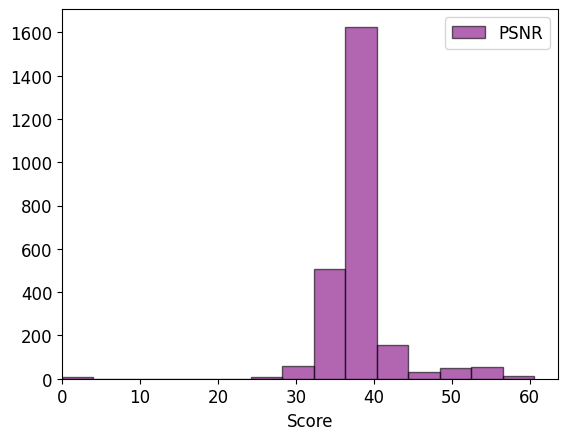

In [106]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_psnr, bins=15, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_test_4.png")

## Visualize Train Set

### Results for each n-fold

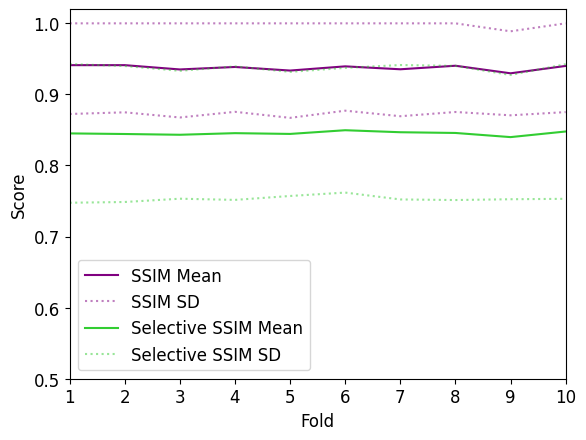

In [8]:
ssim_means = train_results_ssim_0.mean()
ssim_stds = train_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_0.mean()
sssim_stds = train_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_train_0.png")

In [9]:
print(ssim_means, ssim_stds)

0    0.941166
1    0.941164
2    0.935124
3    0.938611
4    0.933565
5    0.939475
6    0.935363
7    0.940342
8    0.929695
9    0.940072
dtype: float64 0    0.068696
1    0.066367
2    0.067577
3    0.063095
4    0.066534
5    0.062361
6    0.066036
7    0.065076
8    0.059097
9    0.064961
dtype: float64


In [10]:
print(sssim_means, sssim_stds)

0    0.845145
1    0.844298
2    0.843227
3    0.845492
4    0.844410
5    0.849620
6    0.846792
7    0.845765
8    0.839935
9    0.847827
dtype: float64 0    0.097566
1    0.095653
2    0.089959
3    0.093894
4    0.087297
5    0.087736
6    0.094556
7    0.094367
8    0.087410
9    0.094701
dtype: float64


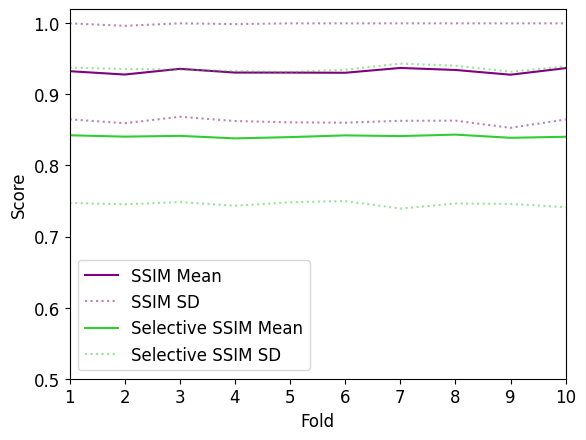

In [11]:
ssim_means = train_results_ssim_1.mean()
ssim_stds = train_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_1.mean()
sssim_stds = train_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_train_1.png")

In [12]:
print(ssim_means, ssim_stds)

0    0.932658
1    0.927983
2    0.935991
3    0.930739
4    0.930685
5    0.930468
6    0.937233
7    0.934394
8    0.927728
9    0.936950
dtype: float64 0    0.067665
1    0.068509
2    0.067440
3    0.068188
4    0.070016
5    0.070237
6    0.074349
7    0.071319
8    0.074728
9    0.072239
dtype: float64


In [13]:
print(sssim_means, sssim_stds)

0    0.842519
1    0.840609
2    0.841690
3    0.838127
4    0.839936
5    0.842354
6    0.841373
7    0.843444
8    0.838957
9    0.840399
dtype: float64 0    0.095239
1    0.095164
2    0.093139
3    0.094748
4    0.091674
5    0.092404
6    0.101998
7    0.096951
8    0.093005
9    0.099076
dtype: float64


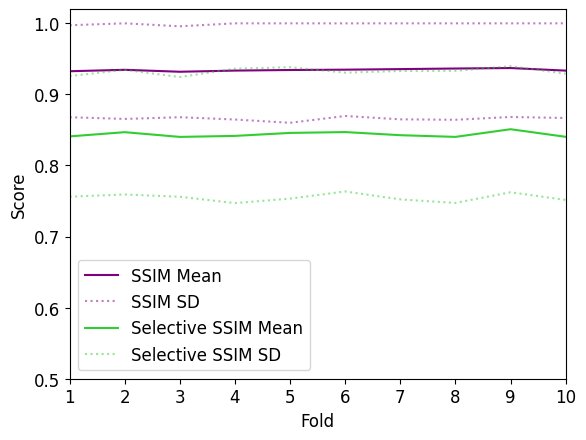

In [14]:
ssim_means = train_results_ssim_2.mean()
ssim_stds = train_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_2.mean()
sssim_stds = train_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_train_2.png")

In [15]:
print(ssim_means, ssim_stds)

0    0.932609
1    0.934632
2    0.931884
3    0.933526
4    0.934345
5    0.934807
6    0.935609
7    0.936428
8    0.937109
9    0.933486
dtype: float64 0    0.064718
1    0.069134
2    0.063964
3    0.068861
4    0.074283
5    0.065164
6    0.070673
7    0.072097
8    0.068855
9    0.066666
dtype: float64


In [16]:
print(sssim_means, sssim_stds)

0    0.840940
1    0.846876
2    0.840215
3    0.841648
4    0.845838
5    0.847021
6    0.842626
7    0.840242
8    0.851021
9    0.840363
dtype: float64 0    0.084857
1    0.087664
2    0.084212
3    0.094558
4    0.092423
5    0.083588
6    0.090323
7    0.092917
8    0.088712
9    0.088805
dtype: float64


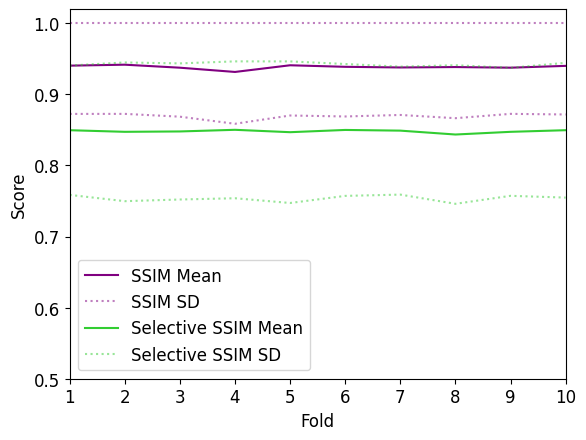

In [17]:
ssim_means = train_results_ssim_3.mean()
ssim_stds = train_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_3.mean()
sssim_stds = train_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_train_3.png")

In [18]:
print(ssim_means, ssim_stds)

0    0.940473
1    0.941820
2    0.937585
3    0.931607
4    0.941007
5    0.938830
6    0.937920
7    0.938509
8    0.937606
9    0.940151
dtype: float64 0    0.067906
1    0.069200
2    0.068910
3    0.072925
4    0.070674
5    0.069859
6    0.066824
7    0.071955
8    0.064961
9    0.068380
dtype: float64


In [19]:
print(sssim_means, sssim_stds)

0    0.849639
1    0.847374
2    0.847895
3    0.850203
4    0.846848
5    0.850010
6    0.849043
7    0.843582
8    0.847365
9    0.849650
dtype: float64 0    0.091006
1    0.097578
2    0.095747
3    0.096288
4    0.099610
5    0.092770
6    0.090010
7    0.097500
8    0.090044
9    0.094808
dtype: float64


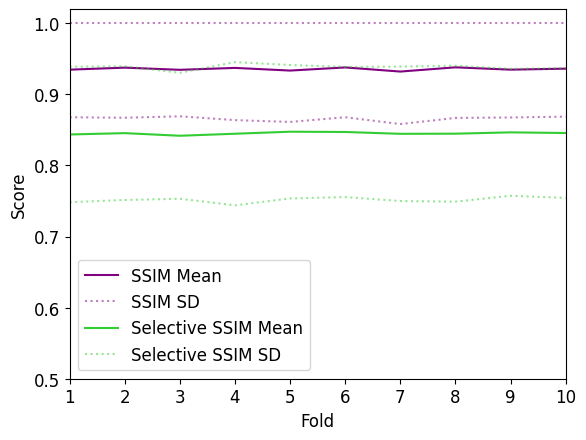

In [20]:
ssim_means = train_results_ssim_4.mean()
ssim_stds = train_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_4.mean()
sssim_stds = train_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_train_4.png")

In [21]:
print(sssim_means, sssim_stds)

0    0.843618
1    0.845520
2    0.841838
3    0.844680
4    0.847531
5    0.847137
6    0.844567
7    0.844755
8    0.846620
9    0.845692
dtype: float64 0    0.095316
1    0.094043
2    0.088635
3    0.100767
4    0.093851
5    0.091587
6    0.094558
7    0.095662
8    0.089266
9    0.091270
dtype: float64


In [22]:
print(ssim_means, ssim_stds)

0    0.934830
1    0.937655
2    0.934613
3    0.937296
4    0.933555
5    0.937954
6    0.932162
7    0.938101
8    0.934830
9    0.936247
dtype: float64 0    0.066975
1    0.070462
2    0.065416
3    0.073448
4    0.072302
5    0.070072
6    0.073881
7    0.071201
8    0.067254
9    0.067538
dtype: float64


### Results for all n-folds combined

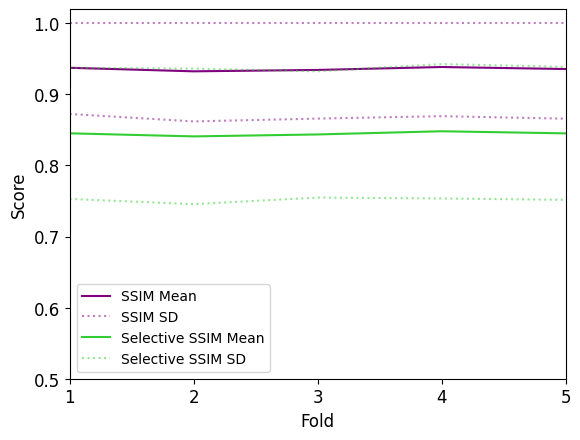

In [23]:
ssim_means_0 = train_results_ssim_0.mean()
ssim_stds_0 = train_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = train_results_ssim_1.mean()
ssim_stds_1 = train_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = train_results_ssim_2.mean()
ssim_stds_2 = train_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = train_results_ssim_3.mean()
ssim_stds_3 = train_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = train_results_ssim_4.mean()
ssim_stds_4 = train_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = train_results_sssim_0.mean()
sssim_stds_0 = train_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = train_results_sssim_1.mean()
sssim_stds_1 = train_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = train_results_sssim_2.mean()
sssim_stds_2 = train_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = train_results_sssim_3.mean()
sssim_stds_3 = train_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = train_results_sssim_4.mean()
sssim_stds_4 = train_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_train_mean_all_folds.png")

In [24]:
print(ssim_means, ssim_stds)

[0.9374577734267936, 0.9324830383426208, 0.934443566388348, 0.9385508129453818, 0.9357242767276297] [0.0649799614182789, 0.07046894258896892, 0.0684413999678102, 0.06915936721546694, 0.06985490060772388]


In [25]:
print(sssim_means, sssim_stds)

[0.8452510855289861, 0.8409408878076091, 0.8436791177297405, 0.8481609162840409, 0.8451959969283604] [0.09231388853478614, 0.09533978954096149, 0.08880588028610878, 0.09453594191498442, 0.09349552054194049]


### Mean and SD on all n-folds combined

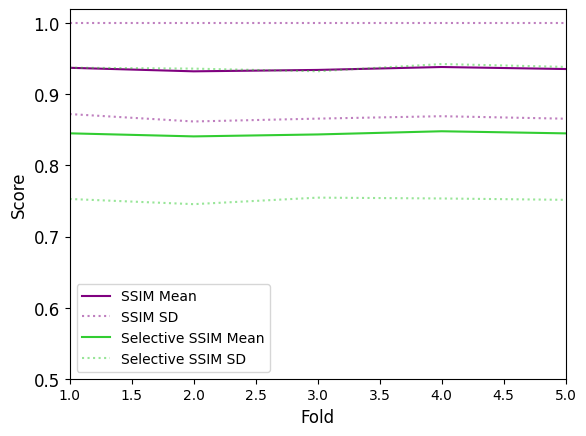

In [13]:
fold_0_train_ssim = np.array(train_results_ssim_0).reshape(-1,1)
fold_1_train_ssim = np.array(train_results_ssim_1).reshape(-1,1)
fold_2_train_ssim = np.array(train_results_ssim_2).reshape(-1,1)
fold_3_train_ssim = np.array(train_results_ssim_3).reshape(-1,1)
fold_4_train_ssim = np.array(train_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_train_ssim)
ssim_std_0 = np.std(fold_0_train_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_train_ssim)
ssim_std_1 = np.std(fold_1_train_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_train_ssim)
ssim_std_2 = np.std(fold_2_train_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_train_ssim)
ssim_std_3 = np.std(fold_3_train_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_train_ssim)
ssim_std_4 = np.std(fold_4_train_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_train_sssim = np.array(train_results_sssim_0).reshape(-1,1)
fold_1_train_sssim = np.array(train_results_sssim_1).reshape(-1,1)
fold_2_train_sssim = np.array(train_results_sssim_2).reshape(-1,1)
fold_3_train_sssim = np.array(train_results_sssim_3).reshape(-1,1)
fold_4_train_sssim = np.array(train_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_train_sssim)
sssim_std_0 = np.std(fold_0_train_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_train_sssim)
sssim_std_1 = np.std(fold_1_train_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_train_sssim)
sssim_std_2 = np.std(fold_2_train_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_train_sssim)
sssim_std_3 = np.std(fold_3_train_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_train_sssim)
sssim_std_4 = np.std(fold_4_train_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.5, ymax=1.02)
plt.savefig("srcnn_results_10_0015/ssim_train_mean_std_all_folds.png")

In [14]:
print(ssim_means, ssim_stds)

[0.9374577734267937, 0.9324830383426209, 0.9344435663883482, 0.9385508129453818, 0.9357242767276298] [0.06510095251128664, 0.07055396183726002, 0.06849489725683053, 0.06921028128344618, 0.06989822493300323]


In [15]:
print(sssim_means, sssim_stds)

[0.8452510855289861, 0.840940887807609, 0.8436791177297406, 0.8481609162840409, 0.8451959969283606] [0.09236780093913649, 0.09534891879086856, 0.08890179755153337, 0.09455820996221119, 0.09351777839282928]


### Distribution of SSIM/SSSIM Values

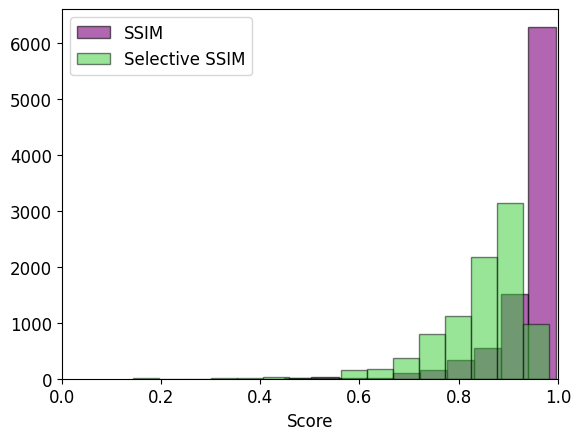

In [29]:
# n fold 0

plt.figure()
plt.hist(fold_0_train_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_train_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_train_0.png")

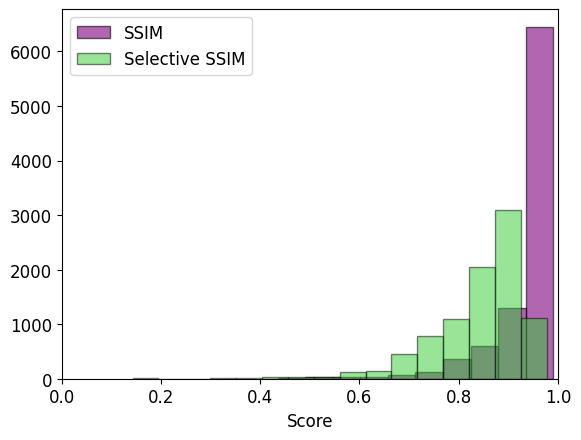

In [30]:
# n fold 1

plt.figure()
plt.hist(fold_1_train_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_train_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_train_1.png")

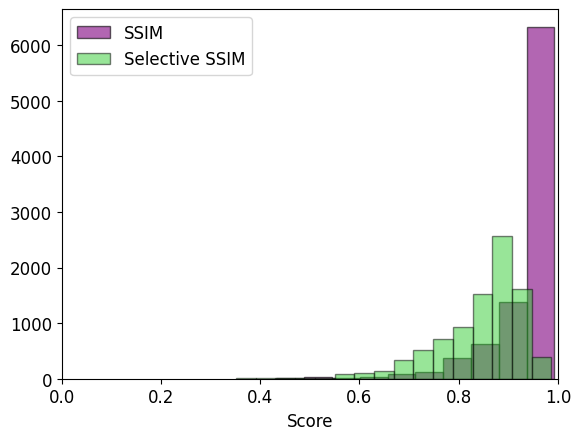

In [31]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_train_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_train_2.png")

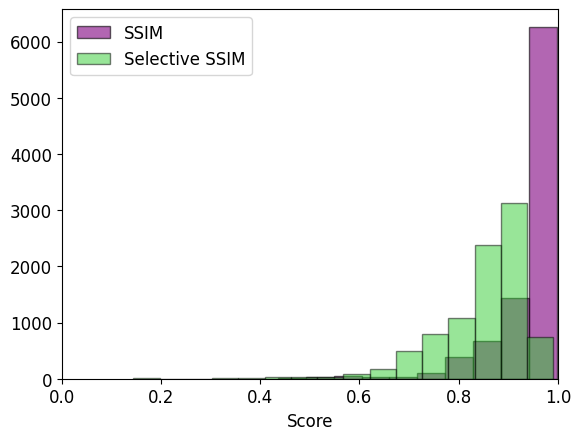

In [32]:
# n fold 3

plt.figure()
plt.hist(fold_3_train_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_train_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_train_3.png")

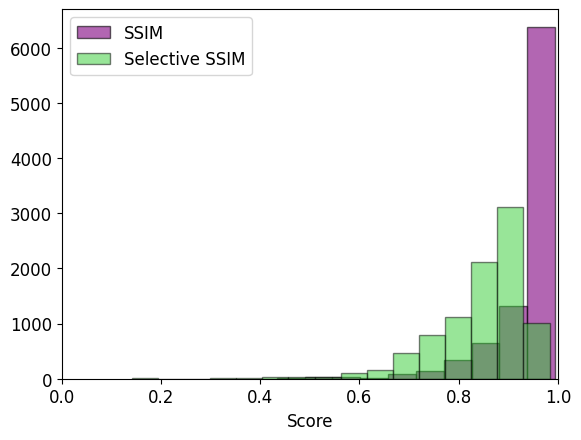

In [33]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_train_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("srcnn_results_10_0015/ssim_distribution_train_4.png")

### PSNR Results for each n-fold

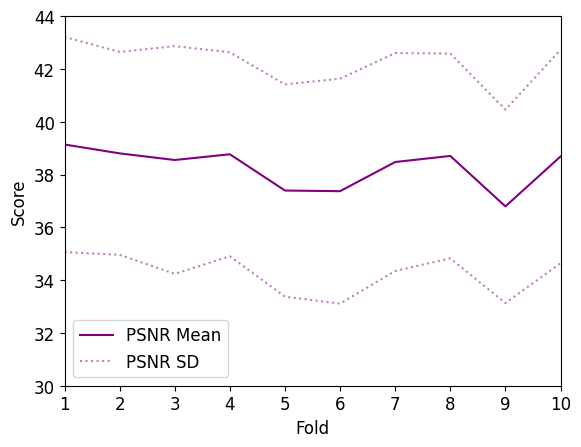

In [34]:
psnr_means = train_results_psnr_0.mean()
psnr_stds = train_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10_0015/psnr_train_0.png")

In [35]:
print(psnr_means, psnr_stds)

0    39.137495
1    38.801260
2    38.549927
3    38.766640
4    37.393717
5    37.369341
6    38.474001
7    38.703560
8    36.793010
9    38.683188
dtype: float64 0    4.075111
1    3.843168
2    4.313566
3    3.863571
4    4.020209
5    4.259204
6    4.127210
7    3.878915
8    3.662964
9    4.042354
dtype: float64


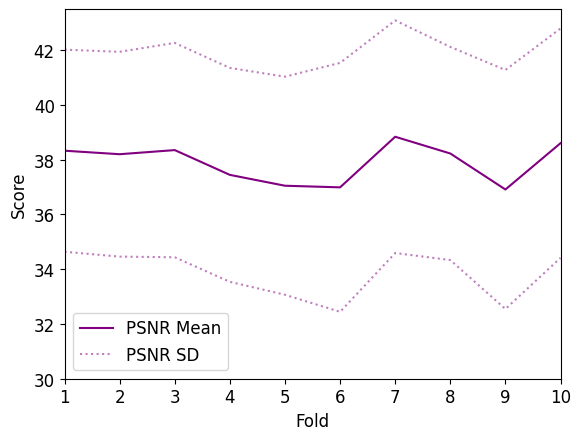

In [36]:
psnr_means = train_results_psnr_1.mean()
psnr_stds = train_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_train_1.png")

In [37]:
print(psnr_means, psnr_stds)

0    38.328537
1    38.200293
2    38.350823
3    37.445627
4    37.049227
5    36.990003
6    38.838556
7    38.226688
8    36.911591
9    38.603908
dtype: float64 0    3.691035
1    3.740309
2    3.914982
3    3.906535
4    3.982718
5    4.545975
6    4.247562
7    3.892850
8    4.365185
9    4.190051
dtype: float64


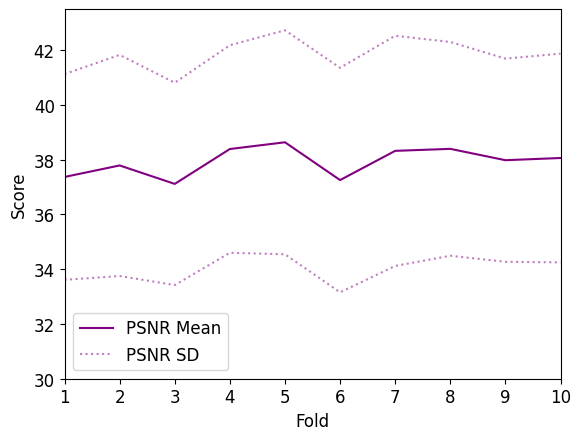

In [39]:
psnr_means = train_results_psnr_2.mean()
psnr_stds = train_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_train_2.png")

In [40]:
print(psnr_means, psnr_stds)

0    37.369610
1    37.789825
2    37.116054
3    38.390397
4    38.636174
5    37.255591
6    38.323113
7    38.396029
8    37.981450
9    38.062047
dtype: float64 0    3.758341
1    4.038398
2    3.695997
3    3.790526
4    4.091399
5    4.100136
6    4.203945
7    3.904259
8    3.710167
9    3.812222
dtype: float64


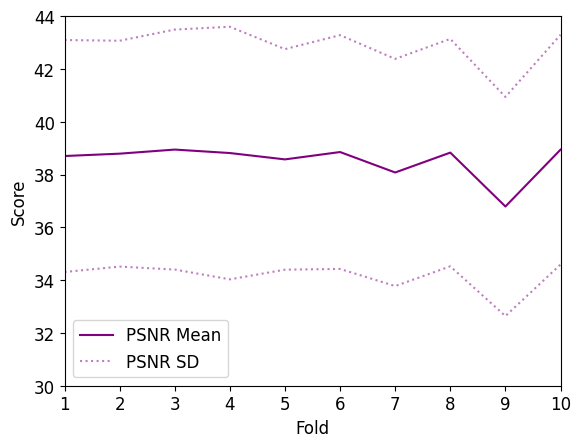

In [42]:
psnr_means = train_results_psnr_3.mean()
psnr_stds = train_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=44)
plt.savefig("srcnn_results_10_0015/psnr_train_3.png")

In [43]:
print(psnr_means, psnr_stds)

0    38.700837
1    38.790111
2    38.945101
3    38.813660
4    38.573004
5    38.851669
6    38.077066
7    38.830008
8    36.789363
9    38.941889
dtype: float64 0    4.393328
1    4.277419
2    4.545200
3    4.783746
4    4.177205
5    4.428149
6    4.302163
7    4.307736
8    4.149923
9    4.350860
dtype: float64


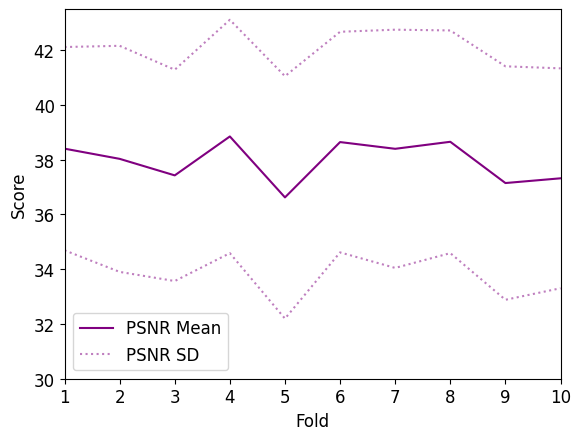

In [44]:
psnr_means = train_results_psnr_4.mean()
psnr_stds = train_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_train_4.png")

In [45]:
print(psnr_means, psnr_stds)

0    38.403212
1    38.031152
2    37.427285
3    38.848891
4    36.623353
5    38.643777
6    38.397939
7    38.654289
8    37.147261
9    37.320488
dtype: float64 0    3.712190
1    4.129014
2    3.859182
3    4.262256
4    4.427061
5    4.028922
6    4.350908
7    4.067003
8    4.263940
9    4.015759
dtype: float64


### PSNR Results for all n-folds combined

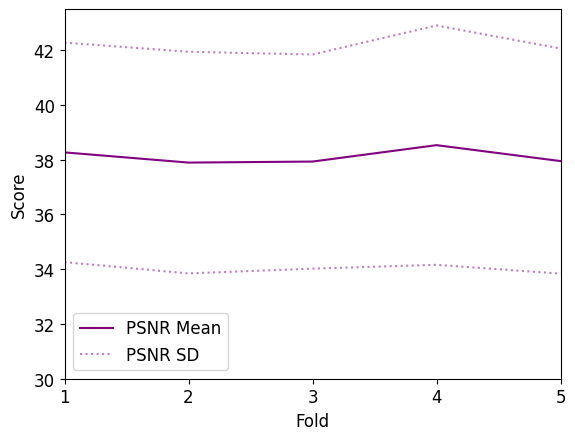

In [48]:
psnr_means_0 = train_results_psnr_0.mean()
psnr_stds_0 = train_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = train_results_psnr_1.mean()
psnr_stds_1 = train_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = train_results_psnr_2.mean()
psnr_stds_2 = train_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = train_results_psnr_3.mean()
psnr_stds_3 = train_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = train_results_psnr_4.mean()
psnr_stds_4 = train_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_train_mean_all_folds.png")

In [49]:
print(psnr_means, psnr_stds)

[38.267213898467176, 37.894525245979814, 37.93202910386233, 38.53127095924233, 37.94976465096088] [4.008627274775213, 4.047720161402934, 3.9105390424200253, 4.371573015209352, 4.111623594885118]


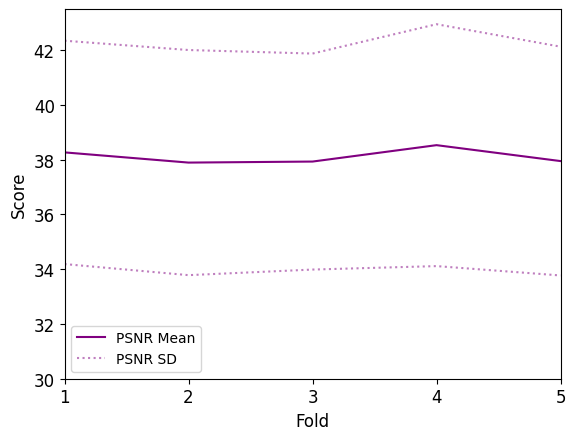

In [16]:
fold_0_train_psnr = np.array(train_results_psnr_0).reshape(-1,1)
fold_1_train_psnr = np.array(train_results_psnr_1).reshape(-1,1)
fold_2_train_psnr = np.array(train_results_psnr_2).reshape(-1,1)
fold_3_train_psnr = np.array(train_results_psnr_3).reshape(-1,1)
fold_4_train_psnr = np.array(train_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_train_psnr)
psnr_std_0 = np.std(fold_0_train_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_train_psnr)
psnr_std_1 = np.std(fold_1_train_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_train_psnr)
psnr_std_2 = np.std(fold_2_train_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_train_psnr)
psnr_std_3 = np.std(fold_3_train_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_train_psnr)
psnr_std_4 = np.std(fold_4_train_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=30, ymax=43.5)
plt.savefig("srcnn_results_10_0015/psnr_train_mean_std_all_folds.png")


In [17]:
print(psnr_means, psnr_stds)

[38.26721389846717, 37.89452524597981, 37.93202910386233, 38.531270959242335, 37.94976465096087] [4.07913013905395, 4.111565035308847, 3.944756865683842, 4.417605715701513, 4.1783070333688155]


### Distribution of PSNR Values

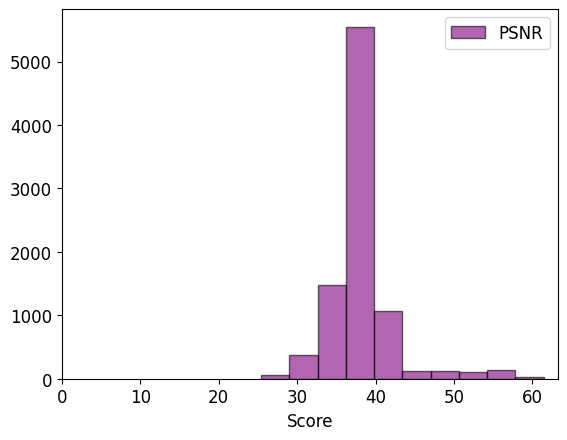

In [62]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_train_0.png")

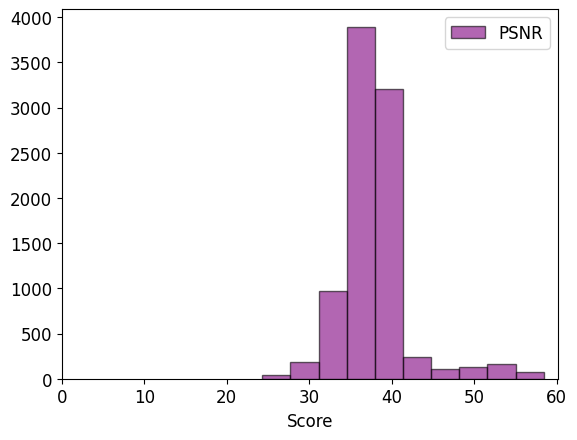

In [61]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_train_1.png")

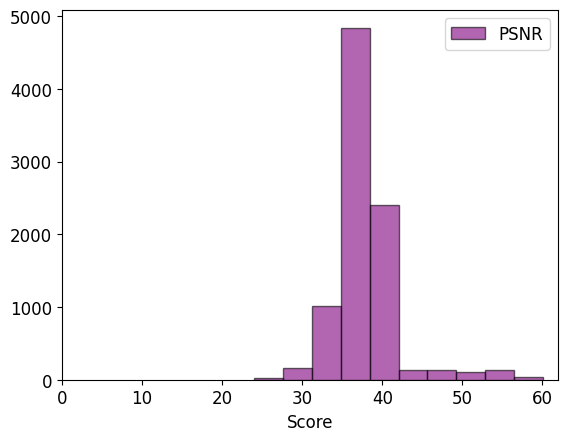

In [60]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_train_2.png")

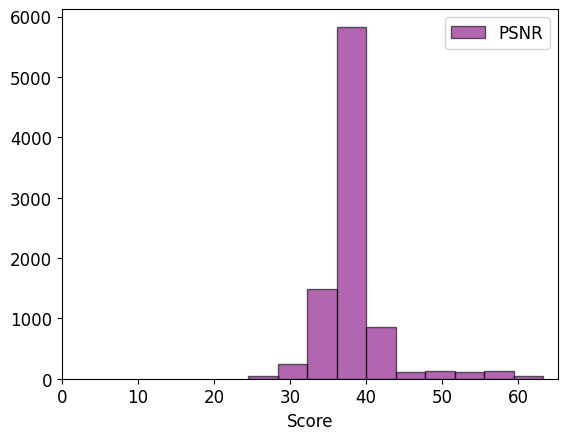

In [59]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_train_3.png")

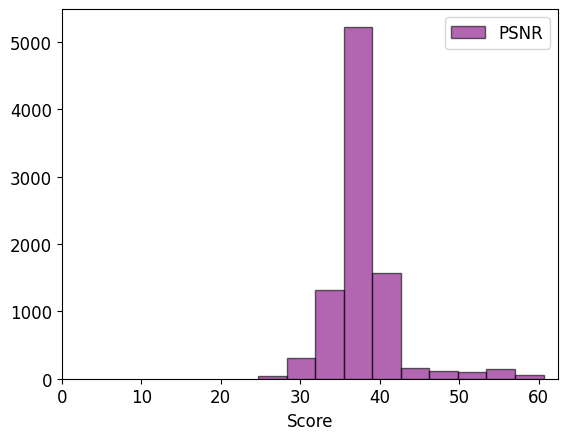

In [58]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("srcnn_results_10_0015/psnr_distribution_train_4.png")